In [25]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import numpy as np

In [26]:
conv1=tf.keras.layers.Conv2D(kernel_size=(3,3),strides=(2,2),padding='valid',filters=16)

In [27]:
pool1=tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))

In [28]:
dropout=tf.keras.layers.Dropout(rate=0.3) # 30% 빼서 학습을 함 

In [29]:
# batch normalization 생성 코드 
bn_model=Sequential([
    Dense(64,input_shape=(4,),activation='relu'),
    BatchNormalization(),
    Dense(128,activation='relu'),
    Dense(3,activation='softmax')
]);

### mnist with cnn

In [30]:
data=tf.keras.datasets.mnist
(train_X,train_Y),(test_X,test_Y)=data.load_data()

train_X=train_X/255.0
test_X=test_X/255.0

In [32]:
# 데이터를 4차원 텐서로 바꿔야 한다. (cnn에 쓰기 위해서)
print(train_X.shape, test_X.shape)

train_X=train_X.reshape(-1,28,28,1) # 데이터수,width,height,1
test_X=test_X.reshape(-1,28,28,1)

print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


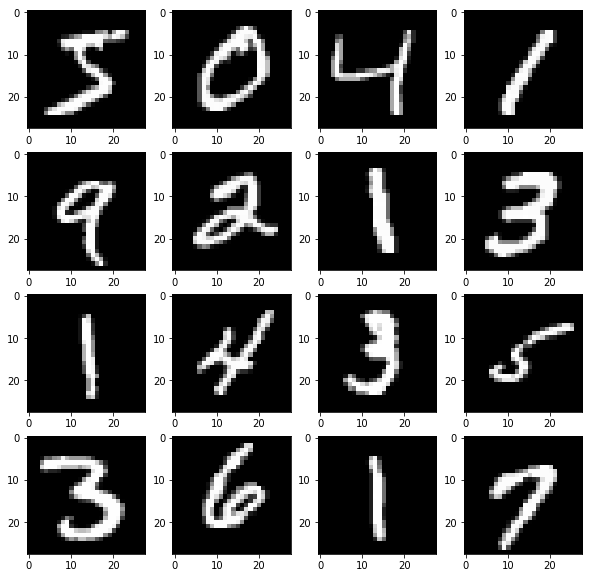

In [33]:
plt.figure(figsize=(10,10))
for c in range(16):
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28),cmap='gray')
plt.show()

In [34]:
print(train_Y[:16])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


In [37]:
train_Y=tf.keras.utils.to_categorical(train_Y,num_classes=10)
test_Y=tf.keras.utils.to_categorical(test_Y,num_classes=10)

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history=model.fit(train_X,train_Y,epochs=25,validation_split=0.25)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

InvalidArgumentError: logits and labels must be broadcastable: logits_size=[32,10] labels_size=[3200,10]
	 [[{{node loss_2/dense_9_loss/softmax_cross_entropy_with_logits}}]]